In [32]:
import pandas as pd
import matplotlib.pyplot as plt

## Import data and filter rows with 500+ pitches thrown in consecutive years

### Caveats with data
- Haven't done work on adjusting for pitches against LHB/RHB. Or taking into account categorical nature of pitch types
- Stuff+,location+,pitching+ data only goes back to 2020

### Main Questions
- Does change in arsenal (quantified by EMD/other metrics) have a significant impact on performance?
- Conditional on stuff+ increasing/decreasing, is change a significant factor
- Is there a relationship between large changes and other variables? Location, stuff, innings pitched?


In [50]:
df = pd.read_csv('pitcher_year_to_year_emd_with_siera_and_stuffplus_teamfilled.csv')
df = df.loc[(df['n_pitches_year1'] > 500) & (df['n_pitches_year2'] > 500)]
print(df.shape)
df.head()

(2163, 132)


,pitcher,start_year,end_year,emd_whitened_sliced,n_pitches_year1,n_pitches_year2,y1_velo_CH,y1_hb_CH,y1_vb_CH,y2_velo_CH,...,team_stuff_y2,stuff+_y2,location+_y2,pitching+_y2,diff_siera,diff_stuff+,diff_location+,diff_pitching+,team_y1_original,team_y2_original
1,A.J. Cole,2017,2018,0.475684,944,871,86.090476,11.076190,9.465079,86.460870,...,NaN,NaN,NaN,NaN,-1.39,NaN,NaN,NaN,WSN,- - -
6,A.J. Minter,2018,2019,0.459521,1003,588,86.231250,-13.125000,-0.409375,86.060000,...,NaN,NaN,NaN,NaN,1.72,NaN,NaN,NaN,ATL,ATL
9,A.J. Minter,2021,2022,0.311691,876,1111,87.205983,-16.588034,3.091453,87.585075,...,ATL,121.194327,100.887715,119.940271,-1.56,1.955337,8.444041,10.946471,ATL,ATL
10,A.J. Minter,2022,2023,0.284961,1111,1060,87.585075,-16.197512,3.389055,86.647973,...,ATL,117.889755,100.041676,113.876817,0.93,-3.304572,-0.846038,-6.063454,ATL,ATL
11,A.J. Minter,2023,2024,0.467814,1060,522,86.647973,-15.368919,5.068243,86.710753,...,ATL,108.479730,99.862042,106.194374,0.32,-9.410025,-0.179634,-7.682444,ATL,ATL


## Example of Small Change - Colin Rea - 2023 to 2024

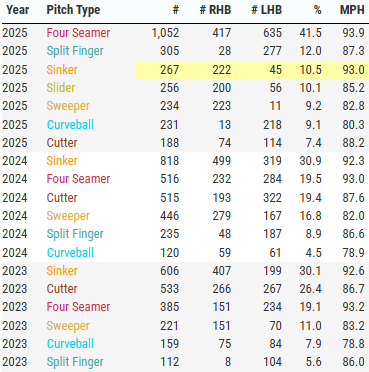

Key Points
 - Sinker/Cutter usage and velocity practically unchanged
 - Main Shift is less cutter usage in 2024 that equates to more sweeper usage.
 - Everything is a similar speed. His velo difference between the cutter and sweeper are not very different, so EMD does not see that change as very large.


In [30]:
df.sort_values('emd_whitened_sliced', ascending=True).head(3)

,pitcher,start_year,end_year,emd_whitened_sliced,n_pitches_year1,n_pitches_year2,y1_velo_CH,y1_hb_CH,y1_vb_CH,y2_velo_CH,...,team_stuff_y2,stuff+_y2,location+_y2,pitching+_y2,diff_siera,diff_stuff+,diff_location+,diff_pitching+,team_y1_original,team_y2_original
992,Colin Rea,2023,2024,0.070093,2016,2650,NaN,NaN,NaN,NaN,...,MIL,96.322798,99.727075,95.480862,-0.04,-3.152521,0.271361,-1.190214,MIL,MIL
3880,Sandy Alcantara,2022,2023,0.073045,3261,2721,91.773154,16.772931,3.733333,91.129704,...,MIA,110.049513,105.036413,114.778915,0.82,-0.428866,1.576333,1.390283,MIA,MIA
2895,Luis Castillo,2020,2021,0.074374,1153,3164,88.210405,16.459827,0.964162,88.333817,...,CIN,108.131317,102.078963,110.441374,0.68,-1.872106,-7.579525,-10.697688,CIN,CIN


## Example of Large Change - Neil Ramirez - 2017 to 2018

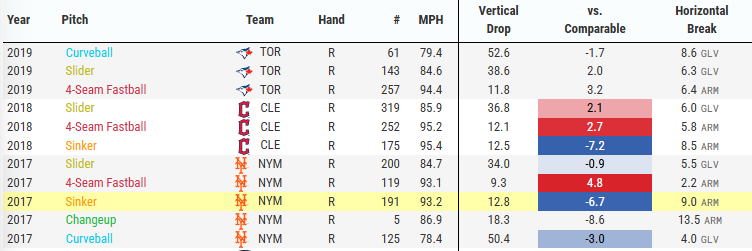

Key Points
- Helps to look at movement differences to see how large of a change this is.
- Completely throws away the curveball (20% usage!) which has a very different shape than the rest of the pitches
- Slider: +10% usage, thrown 1.2mph harder, with more movement
- 4S Fastball: +15% usage and +2 mph! Verty fastball
- Throwing sinker harder with similar movement

In [31]:
df.sort_values('emd_whitened_sliced', ascending=False).head(3)

,pitcher,start_year,end_year,emd_whitened_sliced,n_pitches_year1,n_pitches_year2,y1_velo_CH,y1_hb_CH,y1_vb_CH,y2_velo_CH,...,team_stuff_y2,stuff+_y2,location+_y2,pitching+_y2,diff_siera,diff_stuff+,diff_location+,diff_pitching+,team_y1_original,team_y2_original
3328,Neil Ramírez,2017,2018,1.013255,640,749,86.900000,13.500000,17.880000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2331,Jordan Hicks,2023,2024,0.981314,1113,1958,NaN,NaN,NaN,NaN,...,SFG,105.000922,94.343783,98.954197,0.99,-19.653764,0.913539,-18.334998,- - -,SFG
1803,Ian Kennedy,2018,2019,0.922660,2054,1053,85.047867,12.822275,11.974408,87.947368,...,NaN,NaN,NaN,NaN,-1.09,NaN,NaN,NaN,KCR,KCR


## Breakdown over a career - Charlie Morton

- Largest changes are when he switches teams. We see stuff gets worse, but performance still improves.

In [24]:
df[['pitcher', 'start_year', 'end_year', 'emd_whitened_sliced', 'team_y1', 'team_y2', 'diff_siera', 'diff_stuff+']].loc[df['pitcher'] == 'Charlie Morton']

,pitcher,start_year,end_year,emd_whitened_sliced,team_y1,team_y2,diff_siera,diff_stuff+
799,Charlie Morton,2017,2018,0.293683,HOU,HOU,-0.18,NaN
800,Charlie Morton,2018,2019,0.461789,HOU,TBR,0.02,NaN
801,Charlie Morton,2019,2020,0.335828,TBR,TBR,0.43,NaN
802,Charlie Morton,2020,2021,0.607121,TBR,ATL,-0.44,-4.765562
803,Charlie Morton,2021,2022,0.115545,ATL,ATL,-0.05,-4.406869
804,Charlie Morton,2022,2023,0.134347,ATL,ATL,0.96,-4.279511
805,Charlie Morton,2023,2024,0.162618,ATL,ATL,-0.38,-1.133465
806,Charlie Morton,2024,2025,0.215717,ATL,- - -,0.33,2.872835


## Plots and Charts and Graphs

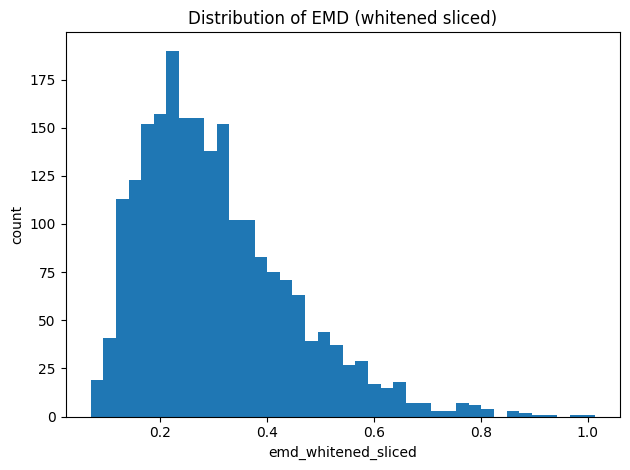

In [34]:
plt.figure()
plt.hist(df["emd_whitened_sliced"].dropna(), bins=40)
plt.title("Distribution of EMD (whitened sliced)")
plt.xlabel("emd_whitened_sliced")
plt.ylabel("count")
plt.tight_layout()

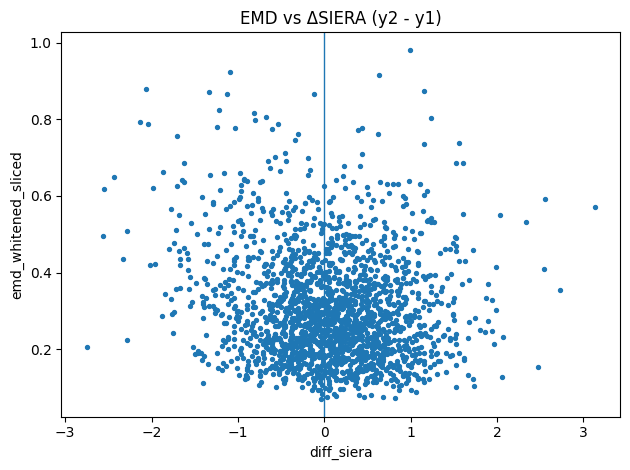

In [35]:
plt.figure()
plt.scatter(df["diff_siera"], df["emd_whitened_sliced"], s=8)
plt.title("EMD vs ΔSIERA (y2 - y1)")
plt.xlabel("diff_siera")
plt.ylabel("emd_whitened_sliced")
plt.axvline(0, linewidth=1)
plt.tight_layout()

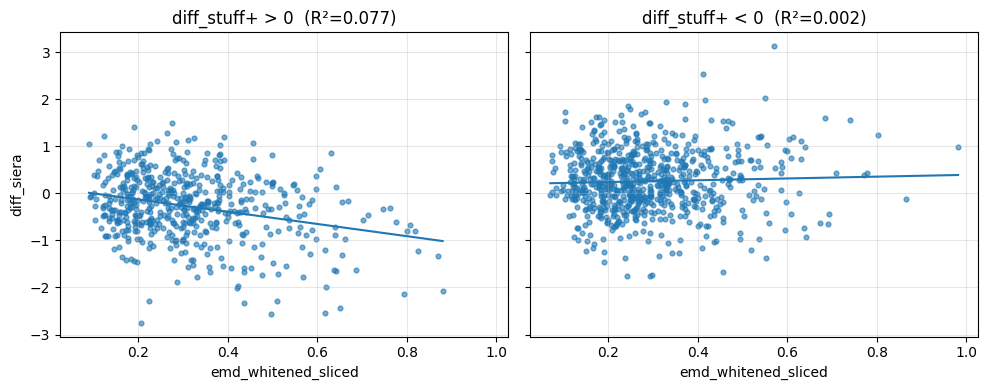

In [ ]:
pos = df["diff_stuff+"] > 0
neg = df["diff_stuff+"] < 0

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

def panel(a, msk, title):
    x = df.loc[msk, "emd_whitened_sliced"].to_numpy() 
    y = df.loc[msk, "diff_siera"].to_numpy()         
    ok = np.isfinite(x) & np.isfinite(y); x, y = x[ok], y[ok]

    b1, b0 = np.polyfit(x, y, 1)
    yhat = b1*x + b0
    r2 = 1 - ((y-yhat)**2).sum() / ((y-y.mean())**2).sum()

    a.scatter(x, y, s=12, alpha=.6)
    xx = np.linspace(x.min(), x.max(), 100)
    a.plot(xx, b1*xx + b0)
    a.set_title(f"{title}  (R²={r2:.3f})")
    a.set_xlabel("emd_whitened_sliced"); a.grid(alpha=.3)

panel(ax[0], pos, "diff_stuff+ > 0")
ax[0].set_ylabel("diff_siera")

panel(ax[1], neg, "diff_stuff+ < 0")

plt.tight_layout(); plt.show()


In [46]:
emd_col = "emd_whitened_sliced"

m = df[df["team_y1"].ne(df["team_y2"]) & df[emd_col].notna()].copy()

# ---- table: destination org (yr2) average EMD when pitcher changed teams
tbl = (m.groupby("team_y2")[emd_col]
         .agg(mean_emd="mean", median_emd="median", n="size")
         .sort_values(["mean_emd","n"], ascending=[False, False]))
tbl


,mean_emd,median_emd,n
team_y2,,,
SFG,0.416062,0.383295,13
MIL,0.385921,0.390318,14
HOU,0.385325,0.347867,13
MIA,0.381238,0.388965,9
MIN,0.363012,0.327107,8
TBR,0.355825,0.304438,18
COL,0.348893,0.352520,8
SEA,0.336470,0.342771,10
ATL,0.332129,0.317271,13


In [49]:
emd_col = "emd_whitened_sliced"

d = df[df[emd_col].notna()].copy()
d["team_change"] = d["team_y1"].ne(d["team_y2"]).map({True: "Team change", False: "No team change"})

# summary table
tbl = (d.groupby("team_change")[emd_col]
        .agg(mean="mean", median="median", n="size", std="std")
        .reindex(["No team change", "Team change"]))
tbl



,mean,median,n,std
team_change,,,,
No team change,0.303201,0.277157,1219,0.139652
Team change,0.310918,0.280812,944,0.146202
